In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv("Data//patient_priority.csv")

In [35]:
df

Unnamed: 0   age  gender  chest pain type  blood pressure  cholesterol  \
0              0  40.0     1.0              2.0           140.0        294.0   
1              1  49.0     0.0              3.0           160.0        180.0   
2              2  37.0     1.0              2.0           130.0        294.0   
3              3  48.0     0.0              4.0           138.0        214.0   
4              4  54.0     1.0              3.0           150.0        195.0   
...          ...   ...     ...              ...             ...          ...   
6957        5105  80.0     0.0              0.0           111.0        153.0   
6958        5106  81.0     0.0              0.0           123.0        157.0   
6959        5107  81.0     0.0              0.0           127.0        185.0   
6960        5108  51.0     1.0              0.0           123.0        161.0   
6961        5109  44.0     0.0              0.0           125.0        176.0   

      max heart rate  exercise angina  plasma glucose  skin_thickness  \
0              172.0              0.0          108.00            43.0   
1              156.0              0.0           75.00            47.0   
2              156.0              0.0           98.00            53.0   
3              156.0              1.0           72.00            51.0   
4              156.0              0.0          108.00            90.0   
...              ...              ...             ...             ...   
6957           166.0              0.0           83.75            31.0   
6958           160.0              0.0          125.20            23.0   
6959           141.0              0.0           82.99            41.0   
6960           162.0              0.0          166.29            34.0   
6961           172.0              0.0           85.28            57.0   

      insulin   bmi  diabetes_pedigree  hypertension  heart_disease  \
0        92.0  19.0           0.467386           0.0            0.0   
1        90.0  18.0           0.467386           0.0            0.0   
2       102.0  23.0           0.467386           0.0            0.0   
3       118.0  18.0           0.467386           0.0            0.0   
4        83.0  21.0           0.467386           0.0            0.0   
...       ...   ...                ...           ...            ...   
6957    108.0  18.6           0.467386           1.0            0.0   
6958     89.0  40.0           0.467386           0.0            0.0   
6959     95.0  30.6           0.467386           0.0            0.0   
6960     93.0  25.6           0.467386           0.0            0.0   
6961    113.0  26.2           0.467386           0.0            0.0   

     Residence_type   smoking_status  triage  
0             Urban     never smoked  yellow  
1             Urban     never smoked  orange  
2             Urban     never smoked  yellow  
3             Urban     never smoked  orange  
4             Urban     never smoked  yellow  
...             ...              ...     ...  
6957          Urban     never smoked  yellow  
6958          Urban     never smoked  yellow  
6959          Rural     never smoked  yellow  
6960          Rural  formerly smoked   green  
6961          Urban          Unknown  yellow  

[6962 rows x 18 columns]

In [36]:
df.nunique()

Unnamed: 0           5110
age                    54
gender                  2
chest pain type         5
blood pressure         90
cholesterol           114
max heart rate         58
exercise angina         2
plasma glucose       3650
skin_thickness         79
insulin                78
bmi                   414
diabetes_pedigree     491
hypertension            2
heart_disease           2
Residence_type          2
smoking_status          4
triage                  4
dtype: int64

In [37]:
df['smoking_status'].unique()

array(['never smoked', 'smokes', 'formerly smoked', 'Unknown'],
      dtype=object)

In [38]:
df['Residence_type'] = df['Residence_type'].map({'Urban' : 1, 'Rural': 0})
df['smoking_status'] = df['smoking_status'].map({'never smoked': 0, 'smokes': 2, 'formerly smoked': 1, 'Unknown': -1})

In [39]:
Y = df['triage']

In [40]:
df.drop(columns=['Unnamed: 0', 'triage'], inplace=True)

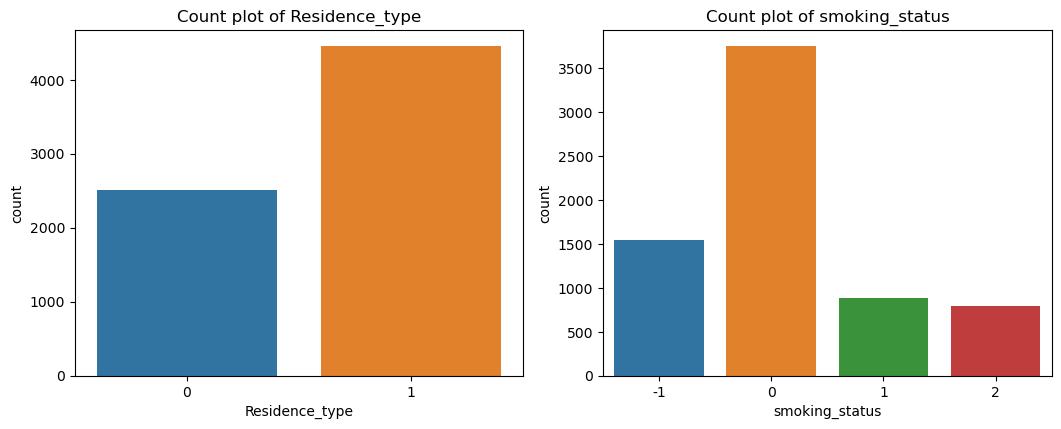

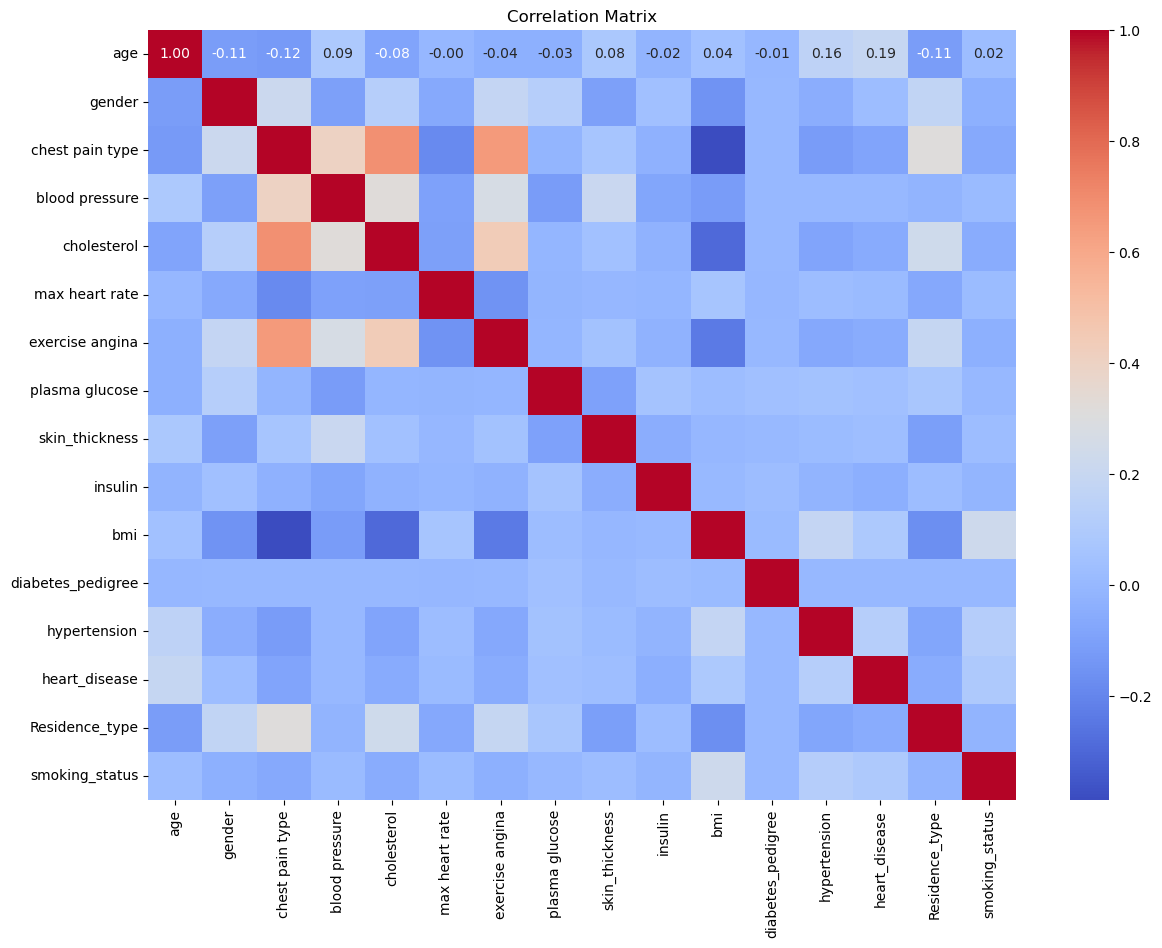

gender               1
age                  0
chest pain type      0
blood pressure       0
cholesterol          0
max heart rate       0
exercise angina      0
plasma glucose       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
hypertension         0
heart_disease        0
Residence_type       0
smoking_status       0
dtype: int64

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Function to handle missing data
missing_data = df.isnull().sum().sort_values(ascending=False)

# Univariate analysis: Distribution of numerical columns
plt.figure(figsize=(16, 12))
for i, col in enumerate(df.select_dtypes(include='float64').columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Count plot for categorical columns
plt.figure(figsize=(16, 8))
for i, col in enumerate(['Residence_type', 'smoking_status'], 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Count plot of {col}')
plt.tight_layout()
plt.show()

# Check correlation between numerical features
corr_matrix = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

missing_data


In [41]:
df

age  gender  chest pain type  blood pressure  cholesterol  \
0     40.0     1.0              2.0           140.0        294.0   
1     49.0     0.0              3.0           160.0        180.0   
2     37.0     1.0              2.0           130.0        294.0   
3     48.0     0.0              4.0           138.0        214.0   
4     54.0     1.0              3.0           150.0        195.0   
...    ...     ...              ...             ...          ...   
6957  80.0     0.0              0.0           111.0        153.0   
6958  81.0     0.0              0.0           123.0        157.0   
6959  81.0     0.0              0.0           127.0        185.0   
6960  51.0     1.0              0.0           123.0        161.0   
6961  44.0     0.0              0.0           125.0        176.0   

      max heart rate  exercise angina  plasma glucose  skin_thickness  \
0              172.0              0.0          108.00            43.0   
1              156.0              0.0           75.00            47.0   
2              156.0              0.0           98.00            53.0   
3              156.0              1.0           72.00            51.0   
4              156.0              0.0          108.00            90.0   
...              ...              ...             ...             ...   
6957           166.0              0.0           83.75            31.0   
6958           160.0              0.0          125.20            23.0   
6959           141.0              0.0           82.99            41.0   
6960           162.0              0.0          166.29            34.0   
6961           172.0              0.0           85.28            57.0   

      insulin   bmi  diabetes_pedigree  hypertension  heart_disease  \
0        92.0  19.0           0.467386           0.0            0.0   
1        90.0  18.0           0.467386           0.0            0.0   
2       102.0  23.0           0.467386           0.0            0.0   
3       118.0  18.0           0.467386           0.0            0.0   
4        83.0  21.0           0.467386           0.0            0.0   
...       ...   ...                ...           ...            ...   
6957    108.0  18.6           0.467386           1.0            0.0   
6958     89.0  40.0           0.467386           0.0            0.0   
6959     95.0  30.6           0.467386           0.0            0.0   
6960     93.0  25.6           0.467386           0.0            0.0   
6961    113.0  26.2           0.467386           0.0            0.0   

      Residence_type  smoking_status  
0                  1               0  
1                  1               0  
2                  1               0  
3                  1               0  
4                  1               0  
...              ...             ...  
6957               1               0  
6958               1               0  
6959               0               0  
6960               0               1  
6961               1              -1  

[6962 rows x 16 columns]

In [42]:
X = df

In [44]:
Y

0       yellow
1       orange
2       yellow
3       orange
4       yellow
         ...  
6957    yellow
6958    yellow
6959    yellow
6960     green
6961    yellow
Name: triage, Length: 6962, dtype: object

In [50]:
X = X.dropna()

In [51]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [52]:
wcss = []

for k in range(2,10):
    model = KMeans(n_clusters = k, init="k-means++", random_state=22, n_init=10)
    model.fit(X_scaled)
    wcss.append(model.inertia_)
    print(k)


2
3
4
5
6
7
8
9


In [53]:
wcss

[94897.13764380274,
 87142.6415462521,
 80920.18553351989,
 76124.54500842292,
 70749.77775197316,
 66067.26414740381,
 62007.79213938575,
 58858.61277794511]

Text(0, 0.5, 'Sum of Squared Distances')

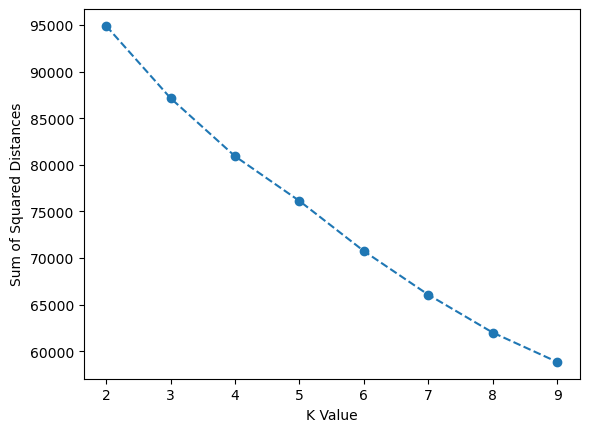

In [55]:
plt.plot(range(2, 10), wcss, '--o');
plt.xlabel("K Value")
plt.ylabel("Sum of Squared Distances")